In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

### 1. Reading the dataset

In [107]:
df = pd.read_excel("iris_assignment.xls")

In [108]:
pd.set_option('display.max_rows', None)  # to show all rows

In [109]:
print(df)

      SL   SW   PL   PW   Classification
0    5.1  3.5  1.4  0.2      Iris-setosa
1    4.9  3.0  1.4  0.2      Iris-setosa
2    NaN  3.2  1.3  0.2      Iris-setosa
3    4.6  3.1  1.5  0.2      Iris-setosa
4    5.0  3.6  1.4  0.2      Iris-setosa
5    5.4  3.9  1.7  0.4      Iris-setosa
6    4.6  3.4  1.4  0.3      Iris-setosa
7    5.0  3.4  1.5  0.2      Iris-setosa
8    4.4  2.9  1.4  0.2      Iris-setosa
9    4.9  3.1  1.5  0.1      Iris-setosa
10   5.4  NaN  1.5  0.2      Iris-setosa
11   4.8  3.4  1.6  0.2      Iris-setosa
12   4.8  3.0  1.4  0.1      Iris-setosa
13   4.3  3.0  1.1  0.1      Iris-setosa
14   5.8  4.0  1.2  0.2      Iris-setosa
15   5.7  4.4  1.5  0.4      Iris-setosa
16   5.4  3.9  1.3  0.4      Iris-setosa
17   5.1  3.5  1.4  0.3      Iris-setosa
18   5.7  3.8  1.7  0.3      Iris-setosa
19   5.1  3.8  1.5  0.3      Iris-setosa
20   5.4  3.4  1.7  0.2      Iris-setosa
21   NaN  3.7  1.5  0.4      Iris-setosa
22   4.6  3.6  1.0  0.2      Iris-setosa
23   5.1  3.3  1

# EDA

In [110]:
df.head(10)


,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [112]:
df.shape

(150, 5)

### 2. Finding missing values

In [113]:
features_na=df.isna().sum()
features_na

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [114]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SL,143.0,5.855944,0.828168,4.3,5.1,5.80,6.4,7.9
SW,144.0,3.049306,0.430644,2.0,2.8,3.00,3.3,4.4
PL,144.0,3.756250,1.761306,1.0,1.6,4.35,5.1,6.9
PW,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [115]:
df.corr()

,SL,SW,PL,PW
SL,1.000000,-0.102511,0.873444,0.821584
SW,-0.102511,1.000000,-0.428465,-0.346900
PL,0.873444,-0.428465,1.000000,0.961679
PW,0.821584,-0.346900,0.961679,1.000000


In [116]:
df['Classification'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [117]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# DATA VISUALIZATION

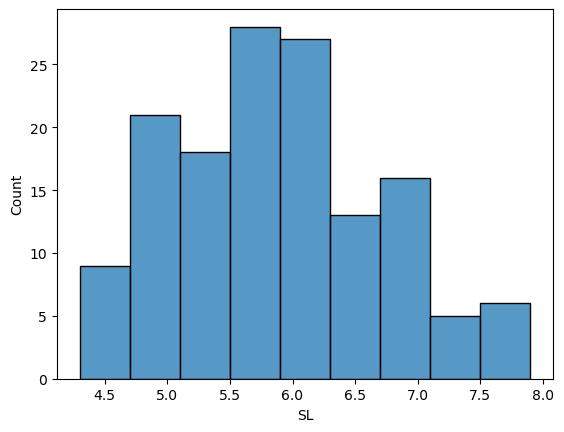

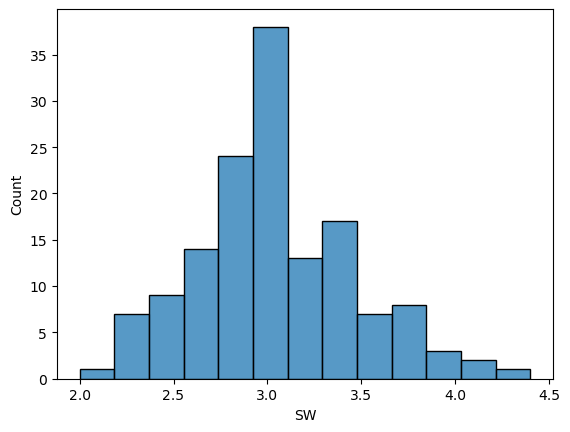

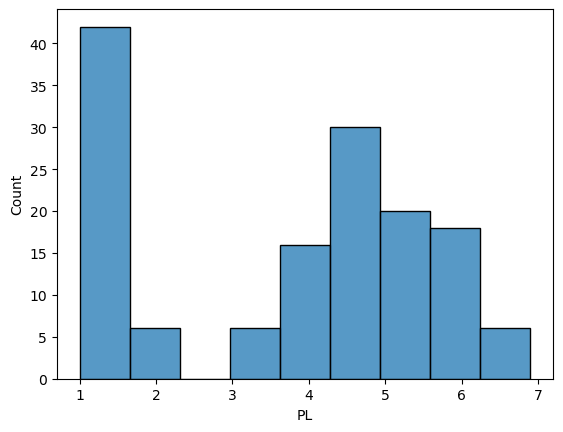

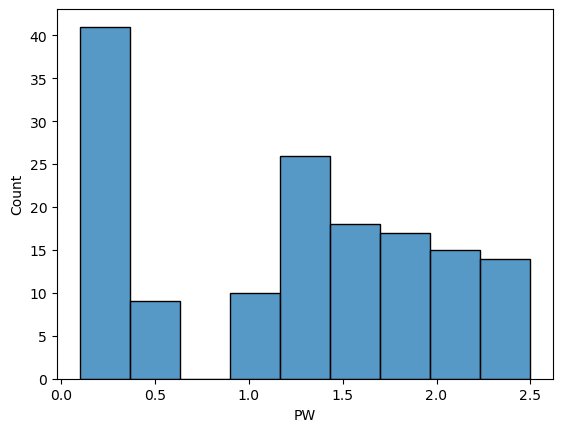

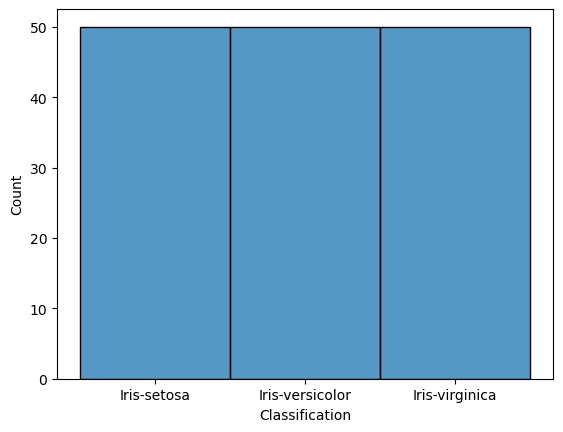

In [118]:
for i in df:
    sns.histplot(x=df[i])
    plt.show()

###  visualize the relationships between all pairs of features on baisis of classification

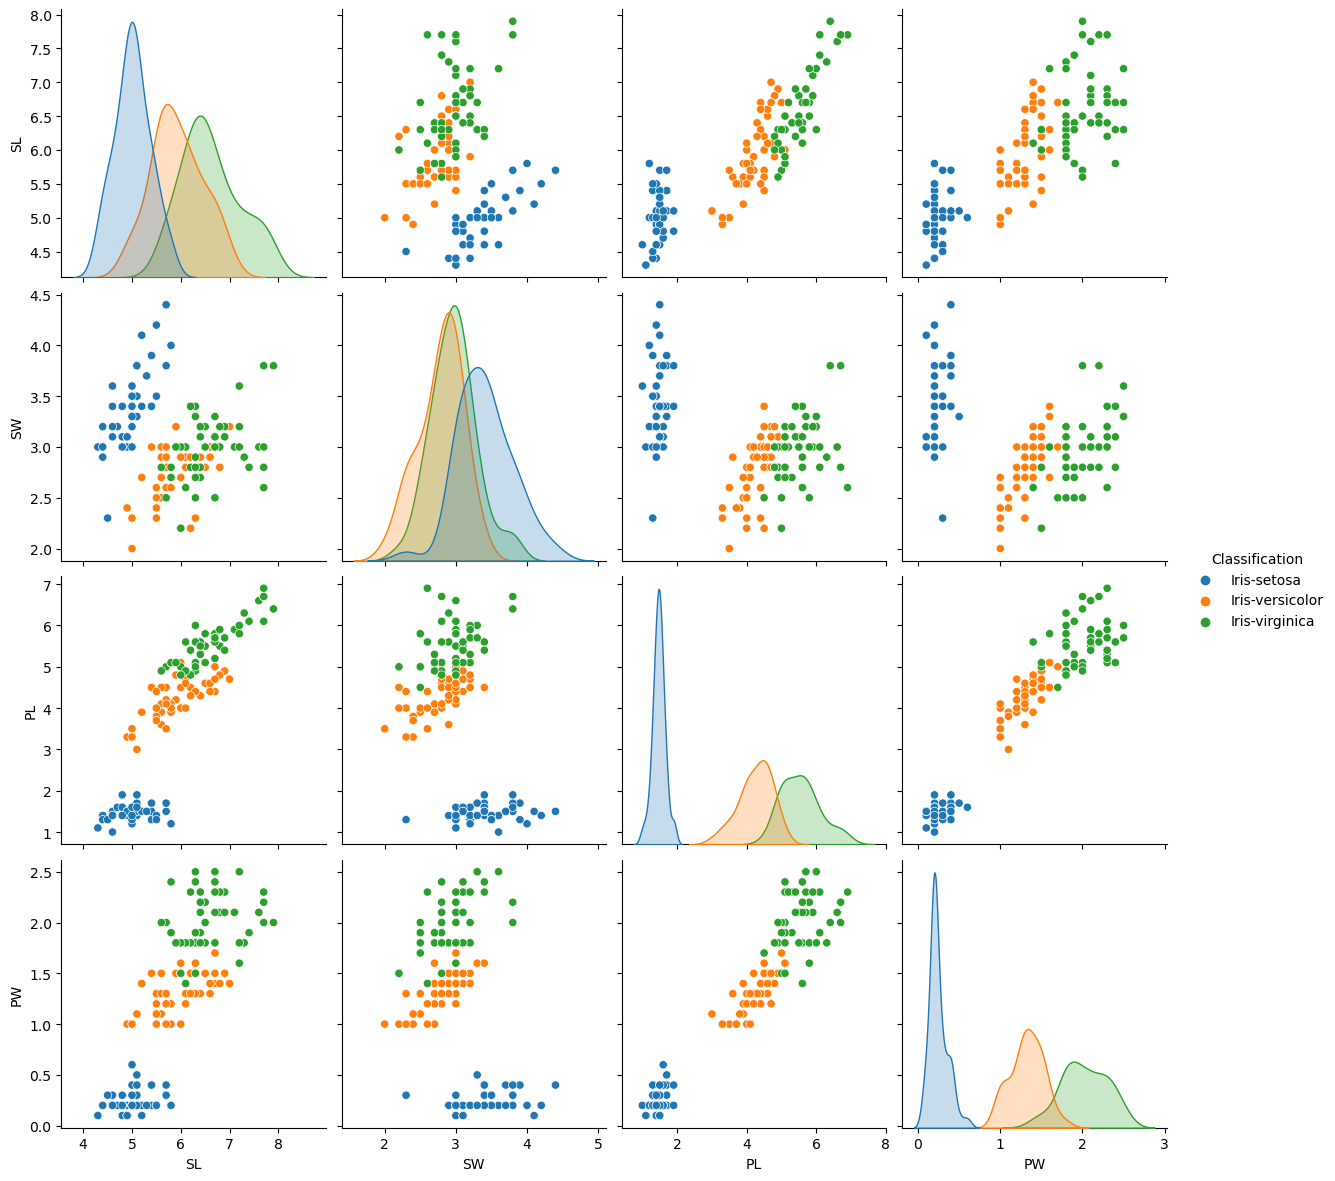

In [119]:
sns.pairplot(df, hue='Classification',height=3)
plt.show()                         

# BOXPLOTS

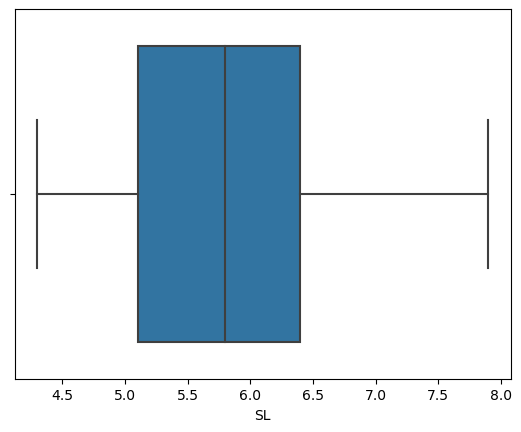

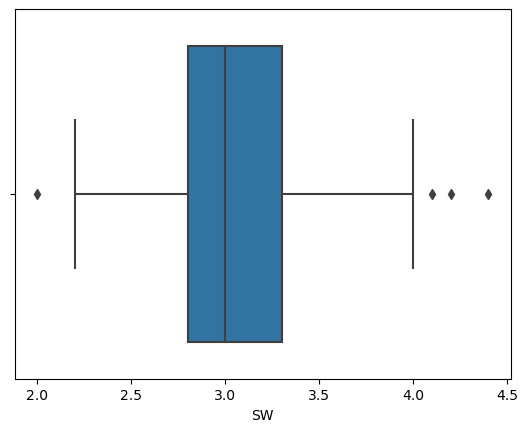

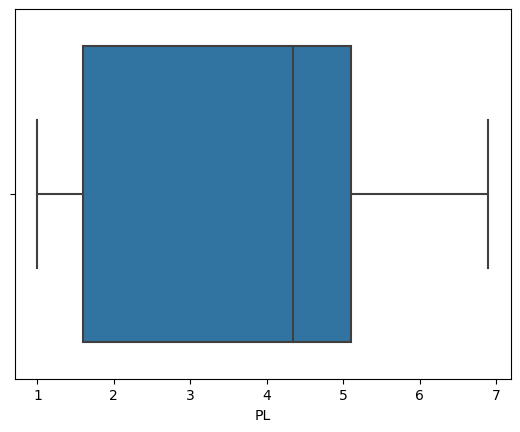

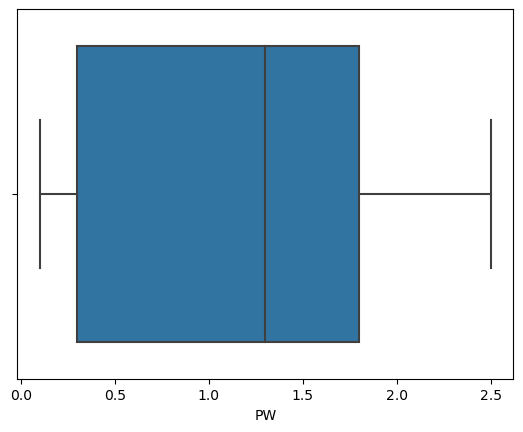

In [120]:
sns.boxplot(x=df['SL'])
plt.show()
sns.boxplot(x=df['SW'])
plt.show()
sns.boxplot(x=df['PL'])
plt.show()
sns.boxplot(x=df['PW'])
plt.show()

In [121]:
df['SW'].max()

4.4

In [122]:
df['SW'].min()

2.0

In [123]:
df['SW'].mean()

3.0493055555555566

## Filling missing values

##### There is not much difference from the mean value and the outlier in the 'SW' feature is not recorder by mistake .Taking the above condition into consideration the outlier values of sepal width('SW') value is not eliminated but adjusted.

In [124]:
sepal_length_mean = df['SL'].mean()
df['SL'].fillna(sepal_length_mean, inplace=True)

sepal_width_median = df['SW'].median()                       # Since the "SW" value has outliers, the missing values was
df['SW'].fillna(sepal_width_median, inplace=True)            # replaced with median

petal_length_mean = df['PL'].mean()
df['PL'].fillna(petal_length_mean, inplace=True)

In [125]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [126]:
df.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,Iris-setosa
1,4.900000,3.0,1.4,0.2,Iris-setosa
2,5.855944,3.2,1.3,0.2,Iris-setosa
3,4.600000,3.1,1.5,0.2,Iris-setosa
4,5.000000,3.6,1.4,0.2,Iris-setosa


In [127]:
df = df.round(2)
df.update(df.round(2))

In [128]:
df.head()

,SL,SW,PL,PW,Classification
0,5.10,3.5,1.4,0.2,Iris-setosa
1,4.90,3.0,1.4,0.2,Iris-setosa
2,5.86,3.2,1.3,0.2,Iris-setosa
3,4.60,3.1,1.5,0.2,Iris-setosa
4,5.00,3.6,1.4,0.2,Iris-setosa


## Adjusting the outliers

In [129]:
#Identify the outliers
sepal_width = df['SW']

q1, q3 = np.percentile(sepal_width, [25, 75])

iqr = q3 - q1
upper_val = q3 + 1.5*iqr
lower_val = q1 - 1.5*iqr

outliers = df[(df['SW'] < lower_val) | (df['SW'] > upper_val)]

#Adjust the outliers
df.loc[df['SW'] < lower_val, 'SW'] = lower_val

df.loc[df['SW'] > upper_val, 'SW'] = upper_val


### checking the boxplot 

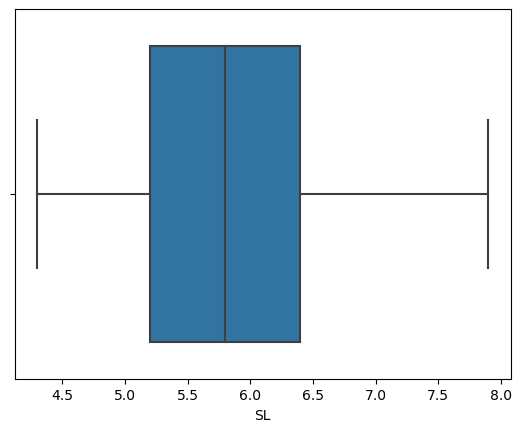

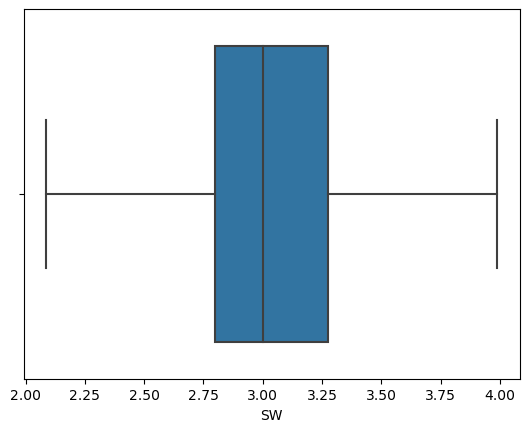

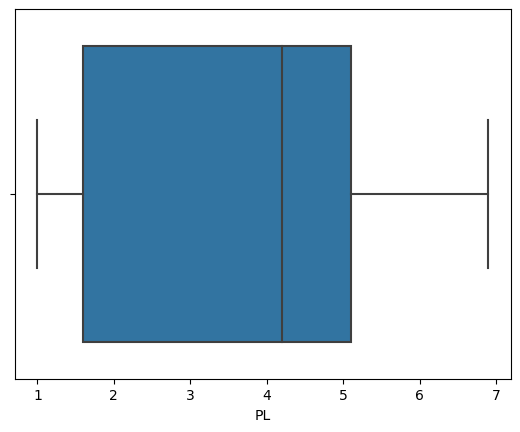

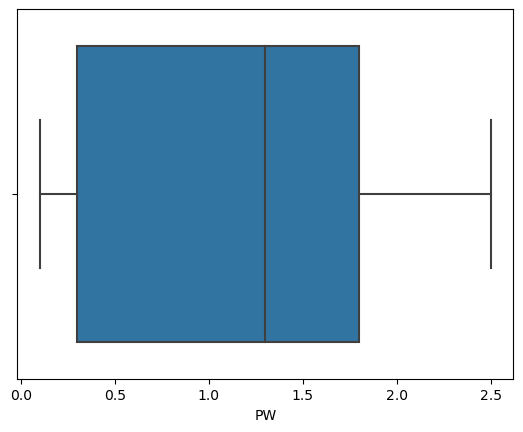

In [130]:
sns.boxplot(x=df['SL'])
plt.show()
sns.boxplot(x=df['SW'])
plt.show()
sns.boxplot(x=df['PL'])
plt.show()
sns.boxplot(x=df['PW'])         # The output has no outliers
plt.show()

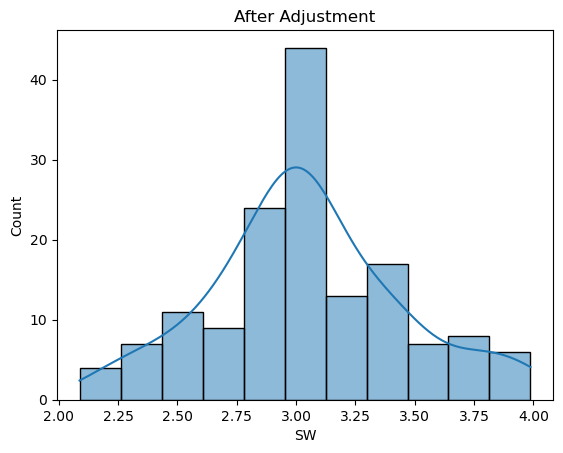

In [131]:
sns.histplot(df["SW"], kde=True)
plt.title("After Adjustment")
plt.show()


# Label Encoding

In [132]:
#Applying Label Encoder
le = LabelEncoder()
df['Classification'] = le.fit_transform(df['Classification'])

In [133]:
df['Classification'].unique()

array([0, 1, 2])

In [134]:
y = df['Classification']
x=df.drop(['Classification'],axis=1)

In [135]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Classification, dtype: int32

In [136]:
x.head()

,SL,SW,PL,PW
0,5.10,3.5,1.4,0.2
1,4.90,3.0,1.4,0.2
2,5.86,3.2,1.3,0.2
3,4.60,3.1,1.5,0.2
4,5.00,3.6,1.4,0.2


# SVM

### svm linear

In [137]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [138]:
from sklearn.svm import SVC

svmclf = SVC (kernel = 'linear') 
svmclf.fit(x_train, y_train)

SVC(kernel='linear')

In [139]:
 y_pred_svm = svmclf.predict(x_test)

In [140]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [141]:
print('accuracy =' ,accuracy_score (y_test, y_pred_svm))

accuracy = 1.0


In [142]:
print(confusion_matrix(y_test, y_pred_svm))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


### svm rbf

In [143]:
from sklearn.svm import SVC
svmclf = SVC (kernel = 'rbf') 
svmclf.fit(x_train, y_train)

SVC()

In [144]:
 y_pred_svm = svmclf.predict(x_test)

In [145]:
print('accuracy =' ,accuracy_score (y_test, y_pred_svm))


accuracy = 0.9777777777777777


In [146]:
print(confusion_matrix(y_test, y_pred_svm))

[[18  1  0]
 [ 0 13  0]
 [ 0  0 13]]


### svm polynomial

In [147]:
from sklearn.svm import SVC
svmclf = SVC (kernel = 'poly') 
svmclf.fit(x_train, y_train)

SVC(kernel='poly')

In [148]:
 y_pred_svm = svmclf.predict(x_test)

In [149]:
print('accuracy =' ,accuracy_score (y_test, y_pred_svm))

accuracy = 0.9777777777777777


In [150]:
print(confusion_matrix(y_test, y_pred_svm))

[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


# kNN


In [151]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
metric_k = []
neighbors = np.arange(3,15)


for k in neighbors:
    classifier = KNeighborsClassifier (n_neighbors=k, metric='minkowski',p=2)
    model = classifier.fit(x_train,y_train)
    y_pred_k = model.predict(x_test)
    acc = accuracy_score (y_test,y_pred_k)
    metric_k.append(acc)


In [152]:
metric_k

[0.9555555555555556,
 0.9777777777777777,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777]

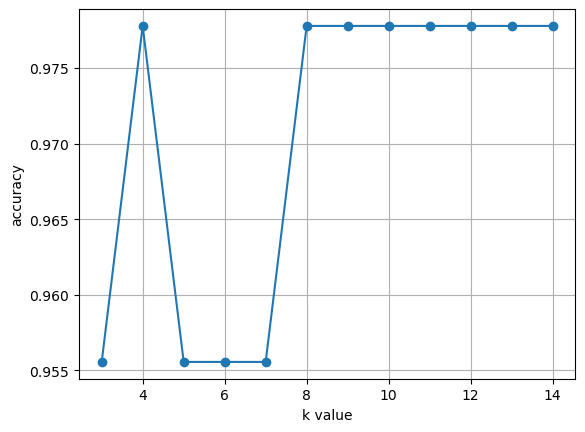

In [153]:
plt.plot(neighbors, metric_k, 'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [154]:
print('Accuracy = ',accuracy_score(y_test,y_pred_k))
print('Precision = ',precision_score(y_test,y_pred_k, average='weighted'))
print('Recall = ',recall_score(y_test,y_pred_k, average='weighted'))
print('F1_score = ',f1_score(y_test,y_pred_k, average='weighted'))


Accuracy =  0.9777777777777777
Precision =  0.9793650793650793
Recall =  0.9777777777777777
F1_score =  0.9778890001112223


print('Precision = ',precision_score(y_test,y_pred, average='weighted'))------
When using 'weighted' as the average parameter, the score is calculated as the weighted average of precision, recall, or F1-score for each class, where the weight corresponds to the number of samples in each class. This can be useful when there is a class imbalance in the dataset, as it gives more importance to the performance of the minority class(es).

# Decsion tree

In [155]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [156]:
y_pred_dt = dt_clf.predict(x_test)
# Calculate the MSE
mse = mean_squared_error(y_test, y_pred_dt)

In [157]:
print('accuracy = ',accuracy_score (y_test,y_pred_dt))
print("Mean Squared Error:", mse)

accuracy =  1.0
Mean Squared Error: 0.0


In [158]:
print(confusion_matrix (y_test,y_pred_dt))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


# Random Forest

In [159]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier() 
rf_clf.fit(x_train, y_train)

RandomForestClassifier()

In [160]:
y_pred_rf = rf_clf.predict(x_test)

In [161]:
print('accuracy =', accuracy_score (y_test,y_pred_rf))


accuracy = 1.0


In [162]:
print(confusion_matrix (y_test,y_pred_rf))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


# LOGISTIC REGRESSION

In [163]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1000)
model = clf.fit(x_train,y_train)

clf = LogisticRegression(max_iter=1000)----------scikit-learn that controls the maximum number of iterations taken by the solver to converge. By default, it is set to 100.By setting max_iter to a larger value, such as 1000, you can allow the solver to take more iterations to converge if needed

In [164]:
y_pred_lg = model.predict(x_test)
# Calculate the MSE
mse = mean_squared_error(y_test, y_pred_lg)

In [165]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

print('Accuracy = ',accuracy_score(y_test,y_pred_lg))
print('Precision = ',precision_score(y_test,y_pred_lg, average='weighted'))
print('Recall = ',recall_score(y_test,y_pred_lg, average='weighted'))
print('F1_score = ',f1_score(y_test,y_pred_lg, average='weighted'))
print("Mean Squared Error:", mse)

Accuracy =  0.9777777777777777
Precision =  0.9793650793650793
Recall =  0.9777777777777777
F1_score =  0.9778890001112223
Mean Squared Error: 0.022222222222222223


# GRADIENT BOOSTING

In [166]:
from sklearn.ensemble import GradientBoostingClassifier
# Train the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier()
gb_clf.fit(x_train, y_train)

GradientBoostingClassifier()

In [167]:
# Make predictions on test set
y_pred_gb = gb_clf.predict(x_test)

In [168]:
# Evaluate accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy:", accuracy_gb)

Accuracy: 1.0


# NAIVE BAYES

In [169]:
from sklearn.naive_bayes import GaussianNB
# Train the Naive Bayes classifier
clf = GaussianNB()
clf.fit(x_train, y_train)

GaussianNB()

In [170]:
# Predict the test set labels
y_pred = clf.predict(x_test)

In [171]:
# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 1.0


# ADA BOOST

In [172]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)


In [173]:
# Train the model
ada_clf.fit(x_train, y_train)

# Make predictions on test data
y_pred = ada_clf.predict(x_test)

In [174]:
# Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [175]:
# Print results
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 1.0
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [176]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


# XG BOOST

In [177]:
from xgboost import XGBClassifier
# Initialize XGBoost classifier
xgb_clf = XGBClassifier()

In [178]:
# Fit the classifier to the training data
xgb_clf.fit(x_train, y_train)

# Make predictions on the testing data
y_pred_xgb = xgb_clf.predict(x_test)

In [179]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:", accuracy)

Accuracy: 1.0
